In [1]:
import os, time, h5py, platform, json, sys
if platform.system() == 'Linux':
    import matplotlib
    matplotlib.use('Agg')
sys.path.append("/Users/gkoolstra/Documents/Code")
from matplotlib import pyplot as plt
from shutil import copyfile
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from termcolor import cprint
from Common import common
from TrapAnalysis import trap_analysis, artificial_anneal as anneal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [17]:
data = common.load_csv(r"/Volumes/slab/_Data/170817 - Gerwins Eccosorb filters/THROUGH.CSV")
fpts_ref, mag_ref, phi_ref = np.hsplit(np.array(data), 3)

for k in range(4):
    data = common.load_csv(r"/Volumes/slab/_Data/170817 - Gerwins Eccosorb filters/GK%d.CSV"%(k+1))
    vars()["fpts_gk%d"%k], vars()["mag_gk%d"%k], vars()["phi_gk%d"%k] = np.hsplit(np.array(data), 3)

/Users/gkoolstra/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


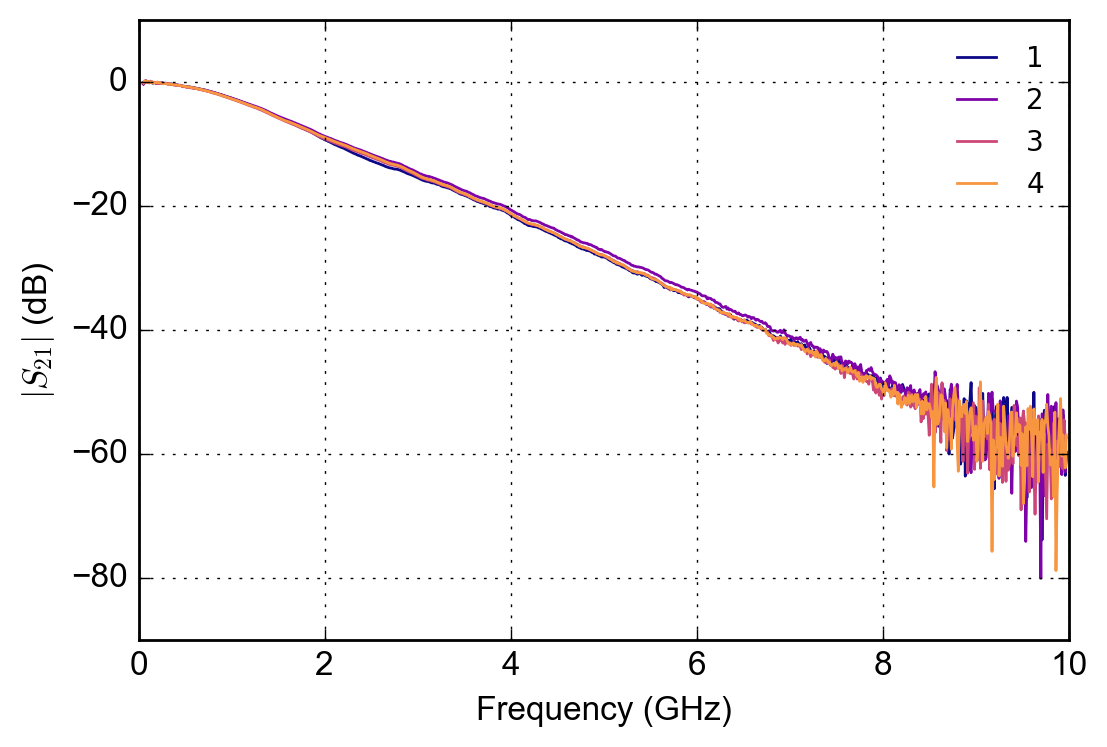

In [25]:
from mpltools import color
color.cycle_cmap(5, cmap=plt.cm.plasma)

fig=plt.figure(figsize=(6.,4.))
common.configure_axes(12)
plt.plot(fpts_gk0.flatten()/1E9, mag_gk0-mag_ref, label="1")
plt.plot(fpts_gk1.flatten()/1E9, mag_gk1-mag_ref, label="2")
plt.plot(fpts_gk2.flatten()/1E9, mag_gk2-mag_ref, label="3")
plt.plot(fpts_gk3.flatten()/1E9, mag_gk3-mag_ref, label="4")
plt.xlabel("Frequency (GHz)")
plt.ylabel("$|S_{21}|$ (dB)")
plt.grid()
plt.legend(loc=0, prop={"size":10}, frameon=False)

common.save_figure(fig, save_path=r"/Volumes/slab/_Data/170817 - Gerwins Eccosorb filters")